## DataFrame Calculations
Write a Python program that contains two DataFrames, one for amino acids and one for
nucleotides. Each DataFrame should have at least 1000 rows and the corresponding amino
acids or nucleotides as columns. Fill the DataFrames with random numbers. For each column
in your DataFrames fullfill the following tasks:
1. Create a Histogram
2. Calculate the Following:
   1. Sum
   2. Mean
   3. Standard deviation
   4. Median
   5. Mode
   6. Variance
   7. Maximum value
   8. Minimum value
3. Find the row with the highest and the lowest number

Afterwards create diagrams of your choice to visualize the calculated values.


#### Additional Exercise 1:     
Adjust your program so that the user can chose to either first enter new data to your
DataFrames or directly start the calculations. Additionally allow the user to choose between
working on either just the protein data, just the nucleotide data or on both of them.


#### Additional Exercise 2:
Create a GUI for your program that allows the user to make his choices and enables him to
enter new data into your DataFrames.
#### Additional Exercise 3:
Let the user choose which calculations he wants to do with the data in the DataFrame, that
means the user can choose between sum, mean, median etc.

Do you wish to work on AminoAcids (A), Nucleotides (N) or both (B)? B
Do you wish to add more data? Yes: Y No: N N


No more data is added


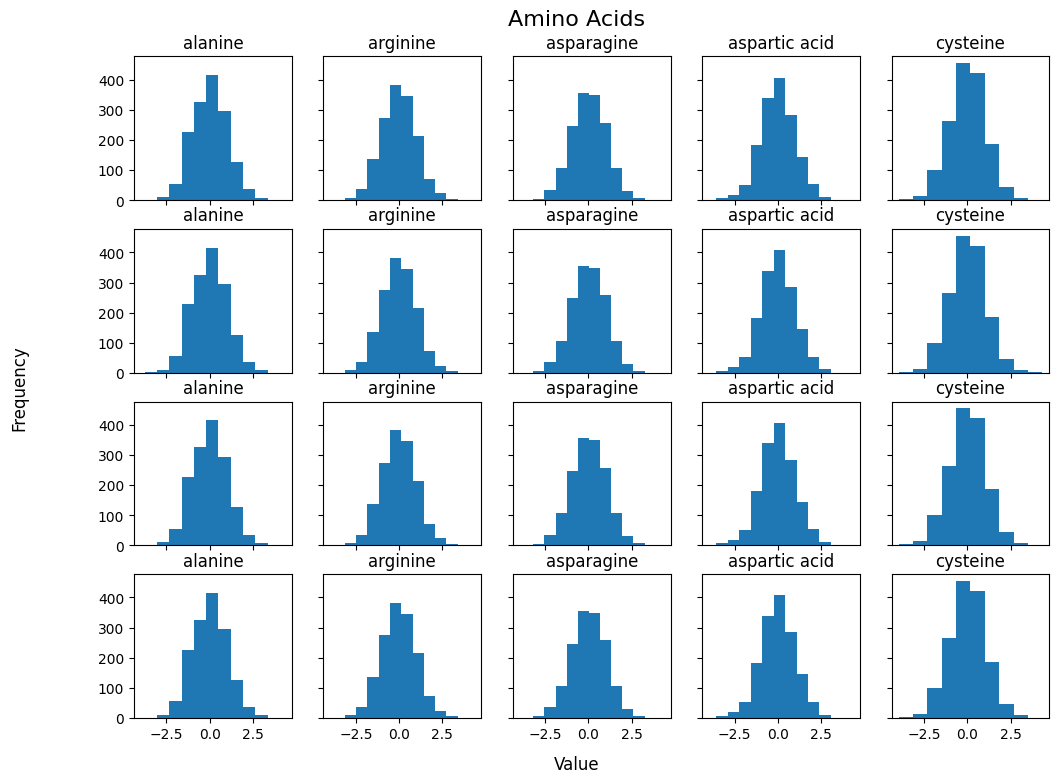

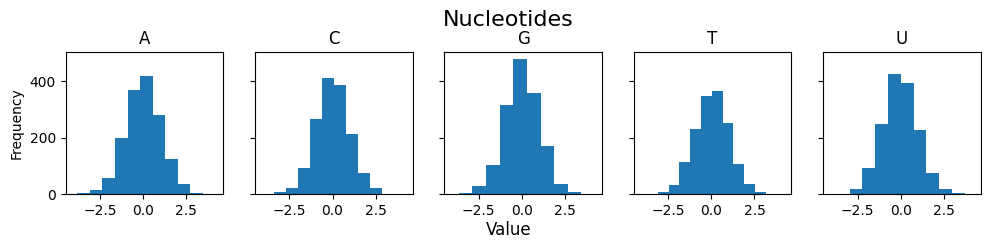

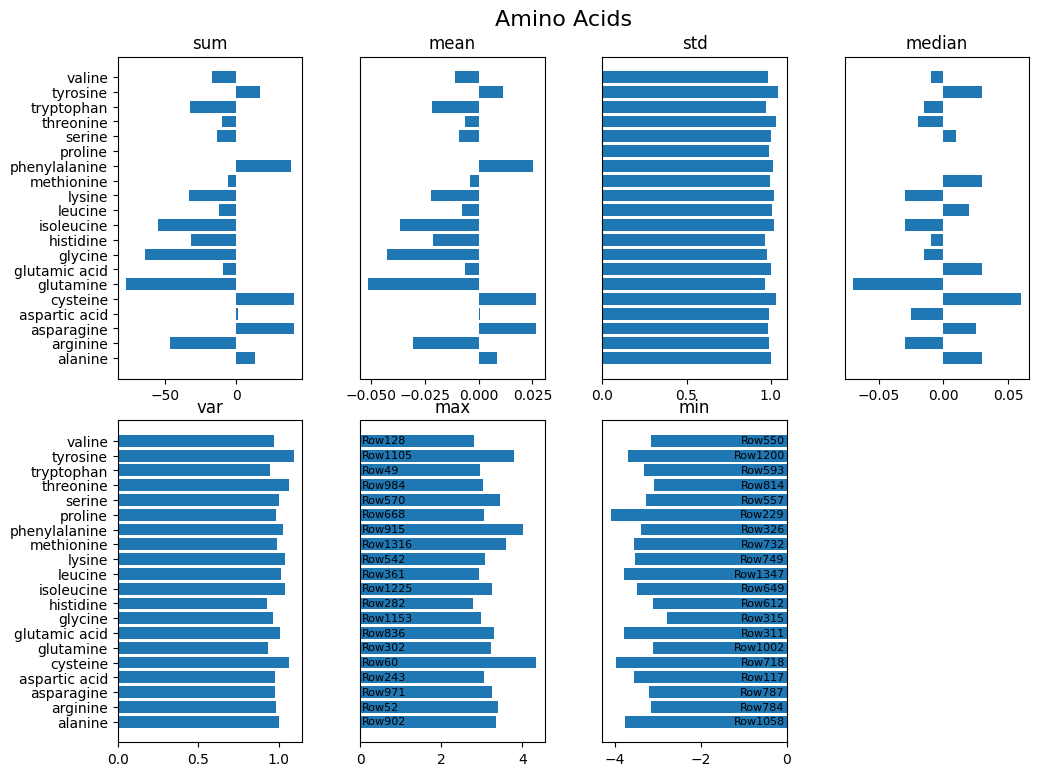

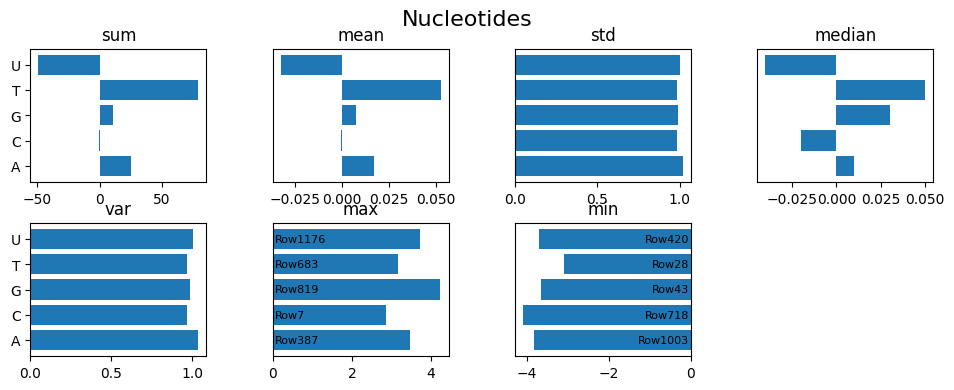

In [2]:
import pandas as pd
import tkinter as tk
import tkinter.font as font
import numpy as np
import matplotlib.pyplot as plt
# centimeters in inches for matplotlib
cm = 1/2.54

############## Functions #####################

# Function to add more data to the amino acid or nucleotide DataFrame using User Input
# invalid input is flagged and asked for until correct
def add_data(df):
    new_row = "Row" + str(len(df)+1)

    for elem in df.columns:
        while True:
            try:
                val = float(input(f"Enter the value for {elem}:"))
            except ValueError:
                print()
                print(f"Invalid input! If value is missing enter NaN.\nElse enter the value for {elem} as a number:")
                continue
            else:
                break
        df.loc[new_row,elem] = val

# Function to do all the calculations and save them in a dictionary
# you need to have a result dictionary before starting (= outer_dict), which can be emtpy or added to
# you then need the DataFrame to be analysed (df) and a name describing the df
def df_calc(df, name, outer_dict):
    if type(outer_dict) != dict:
        raise Exception ("The outer_dict must be a dictionary!")
    elif type(name) != str:
        raise Exception ("The name must be a string!")
    elif type(df) != pd.core.frame.DataFrame or not df_aa.select_dtypes(exclude=["float", 'int']).empty:
        raise Exception ("The DataFrame must be a Pandas DataFrame containg only floats or integers!")
    else:
        outer_dict[name] = {}
        
        outer_dict[name]["sum"] = {}
        outer_dict[name]["mean"] = {}
        outer_dict[name]["std"] = {}
        outer_dict[name]["median"] = {}
        outer_dict[name]["mode"] = {}
        outer_dict[name]["var"] = {}
        outer_dict[name]["max"] = {}
        outer_dict[name]["min"] = {}
        outer_dict[name]["idxmin"] = {}
        outer_dict[name]["idxmax"] = {}
        
        for names in df.columns:
            outer_dict[name]["sum"][names] = df.sum()[names]
            outer_dict[name]["mean"][names] = df.mean()[names]
            outer_dict[name]["std"][names] = df.std()[names]
            outer_dict[name]["median"][names] = df.median()[names]
            outer_dict[name]["mode"][names] = df.mode()[names]
            outer_dict[name]["var"][names] = df.var()[names]
            outer_dict[name]["max"][names] = df.max()[names]
            outer_dict[name]["min"][names] = df.min()[names]
            outer_dict[name]["idxmin"][names] = df.idxmin()[names]
            outer_dict[name]["idxmax"][names] = df.idxmax()[names]


#### First off ask the User if they want to work with AA, Nucleotides or both
# I allow upper and lowercase for ease of use
input0 = input("Do you wish to work on AminoAcids (A), Nucleotides (N) or both (B)?")

# check that there was valid input
while input0 != "A" and input0 != "a" and input0 != "N" and input0 != "n" and input0 != "B" and input0 != "b":
    input0 = input("Invalid input, please enter A for AminoAcids, N for Nucleotides or B for both")

# make it uppercase so I only have to check for one case
input0 = input0.upper()


#### Create the DataFrames
# Prepare the row and col names. 
# To keep the lines short and readable I create the amino acids names in two steps 
rownames1 = ["Row"+str(i) for i in range(1,1501)]
colnamesN = ["A","C","G","T","U"]
colnamesA = ["alanine","arginine","asparagine","aspartic acid","cysteine","glutamine","glutamic acid","glycine","histidine","isoleucine"]
colnamesA2 = ["leucine","lysine","methionine","phenylalanine","proline","serine","threonine","tryptophan","tyrosine","valine"]
colnamesA.extend(colnamesA2)

# create the actual DataFrames
df_aa = pd.DataFrame(np.random.randn(1500,20), index = rownames1, columns = colnamesA)
df_nt = pd.DataFrame(np.random.randn(1500,5), index = rownames1, columns = colnamesN)

#round the random numbers for ease of readability
for i in range(0,1500):
    for j in range(0,20):
        df_aa.iloc[i,j] = round(df_aa.iloc[i,j],2)

for i in range(0,1500):
    for j in range(0,5):
        df_nt.iloc[i,j] = round(df_nt.iloc[i,j],2)

#### Ask if more data is to be added
input1 = input("Do you wish to add more data? Yes: Y No: N")
while input1 != "y" and input1 != "Y" and input1 != "N" and input1 != "n":
    input1 = input("Invalid input, please enter Y for Yes or N for No")

# make it uppercase so I only have to check for one case
input1 = input1.upper()

# if both data sets are being worked with ask where data is to be added
if input0 == "B" and input1 == "Y":
    input_aa = input ("Do you wish to enter data for AminoAcids? Yes: Y No: N")
    while input_aa != "y" and input_aa != "Y" and input_aa != "N" and input_aa != "n":
        input_aa = input("Invalid input, please enter Y for Yes or N for No")
    input_aa = input_aa.upper()
    
    input_nt = input ("Do you wish to enter data for Nucleotides? Yes: Y No: N")
    while input_nt != "y" and input_nt != "Y" and input_nt != "N" and input_nt != "n":
        input_nt = input("Invalid input, please enter Y for Yes or N for No")
    input_nt = input_nt.upper()

# add data
while input1 == "Y":
    if input0 == "A":
        #add the data
        add_data(df_aa)
        #ask if more data is not be added
        input1 = input("Do you wish to add more data? Yes: Y No: N")
        while input1 != "y" and input1 != "Y" and input1 != "N" and input1 != "n":
            input1 = input("Invalid input, please enter Y for Yes or N for No")
        input1 = input1.upper()

    elif input0 == "N":
        #add the dataa
        add_data(df_nt)
        #ask if more data is not be added
        input1 = input("Do you wish to add more data? Yes: Y No: N")
        while input1 != "y" and input1 != "Y" and input1 != "N" and input1 != "n":
            input1 = input("Invalid input, please enter Y for Yes or N for No")
        input1 = input1.upper()
    
    elif input0 == "B":
        while input_aa == "Y":
            #add the data
            add_data(df_aa)
            #ask if more data is not be added
            input_aa = input("Do you wish to add more data? Yes: Y No: N")
            while input_aa != "y" and input_aa != "Y" and input_aa != "N" and input_aa != "n":
                input_aa = input("Invalid input, please enter Y for Yes or N for No")
            input_aa = input_aa.upper()
        while input_nt == "Y":
            #add the data
            add_data(df_nt)
            #ask if more data is not be added
            input_nt = input("Do you wish to add more data? Yes: Y No: N")
            while input_nt != "y" and input_nt != "Y" and input_nt != "N" and input_nt != "n":
                input_nt = input("Invalid input, please enter Y for Yes or N for No")
            input_nt = input_nt.upper()
        if input_aa == "N" and input_nt == "N":
            input1 = "N"
            

if input1 == "N":
    print("No more data is added")

#### Create the histograms

# Histogram for the amino acids
if input0 == "A" or input0== "B":
    fig, axs = plt.subplots(4,5,sharex=True, sharey = True)
    fig.set_figwidth(30*cm)
    fig.set_figheight(20*cm)
    #fig.suptitle('Nucleotides')
    for i,j in zip([0,1,2,3,4,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4],[0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,3,3,3,3,3]):
        axs[j,i].hist(df_aa.iloc[:,i])
        axs[j,i].set(title = df_aa.iloc[:,i].name)

    # Hide x labels and tick labels for top plots and y ticks for right plots
    for ax in axs.flat:
        ax.label_outer()
    fig.suptitle("Amino Acids", fontsize=16)
    fig.supxlabel('Value')
    fig.supylabel('Frequency')
    plt.subplots_adjust(top=0.92, bottom =0.08)

    plt.show() 
    #plt.savefig("Image.png")
    plt.close()

# Histogram for the nulceotides
if input0 == "N" or input0== "B":
    fig, axs = plt.subplots(1,5,sharex=True, sharey = True)
    fig.set_figwidth(30*cm)
    fig.set_figheight(6*cm)
    #fig.suptitle('Nucleotides')
    for i in range(0,len(df_nt.columns)):
        axs[i].hist(df_nt.iloc[:,i])
        axs[i].set( ylabel='Frequency', title = df_nt.iloc[:,i].name)

    # Hide x labels and tick labels for top plots and y ticks for right plots
    for ax in axs.flat:
        ax.label_outer()
    fig.suptitle("Nucleotides", fontsize=16)
    fig.supxlabel('Value')
    plt.subplots_adjust(top=0.8, bottom =0.2)

    plt.show() 
    #plt.savefig("Image.png")
    plt.close()

#### Perform the calculations
#first set the result dictionary
results = {}

#run the calculations
if input0 == "A" or input0== "B":
    df_calc(df_aa, "amino_acids", results)

if input0 == "N" or input0== "B":
    df_calc(df_nt, "nucleotides", results)

#### Plot the calculation results

# Plot the results for the Amino Acids
if input0 == "A" or input0== "B":
    fig, axs = plt.subplots(2,4)
    fig.set_figwidth(25*cm)
    fig.set_figheight(20*cm)
    fig.tight_layout()
    fig.suptitle("Amino Acids", fontsize=16)
    for calc,i,j in zip(results["amino_acids"],[0,0,0,0,0,1,1,1,1,1],[0,1,2,3,4,0,1,2,3,4]):
        if i == 1 and j == 3:
            axs[i,j].axis('off')
        if calc == "mode" or calc == "idxmin" or calc == "idxmax":
            continue
        axs[i,j].barh(list(results["amino_acids"][calc].keys()),results["amino_acids"][calc].values())
        axs[i,j].set( title=calc)
        if calc == "max":
            for names in results["amino_acids"]["max"]:
                axs[i,j].text(0.05,names,results["amino_acids"]["idxmax"][names],fontsize = 8, verticalalignment = "center", horizontalalignment = "left")
        if calc == "min":
            for names in results["amino_acids"]["min"]:
                axs[i,j].text(-0.05,names,results["amino_acids"]["idxmin"][names],fontsize = 8, verticalalignment = "center", horizontalalignment = "right")
        if j != 0:
            axs[i,j].set(yticks = [])

    plt.subplots_adjust(top=0.92)
    plt.show() 
    #plt.savefig("Project_DataFrame_AminoAcid_Results.png")
    plt.close()


# Plot the results for the Nucleotides
if input0 == "N" or input0== "B":
    fig, axs = plt.subplots(2,4)
    fig.set_figwidth(25*cm)
    fig.set_figheight(10*cm)
    fig.tight_layout()
    fig.suptitle("Nucleotides", fontsize=16)
    for calc,i,j in zip(results["nucleotides"],[0,0,0,0,0,1,1,1,1,1],[0,1,2,3,4,0,1,2,3,4]):
        if i == 1 and j == 3:
            axs[i,j].axis('off')
        if calc == "mode" or calc == "idxmin" or calc == "idxmax":
            continue
        axs[i,j].barh(list(results["nucleotides"][calc].keys()),results["nucleotides"][calc].values())
        axs[i,j].set( title=calc)
        if calc == "max":
            for names in results["nucleotides"]["max"]:
                axs[i,j].text(0.05,names,results["nucleotides"]["idxmax"][names],fontsize = 8, verticalalignment = "center", horizontalalignment = "left")
        if calc == "min":
            for names in results["nucleotides"]["min"]:
                axs[i,j].text(-0.05,names,results["nucleotides"]["idxmin"][names],fontsize = 8, verticalalignment = "center", horizontalalignment = "right")
        if j != 0:
            axs[i,j].set(yticks = [])

    plt.subplots_adjust(top=0.88)
    plt.show() 
    #plt.savefig("Project_DataFrame_Nucleotide_Results.png")
    plt.close()

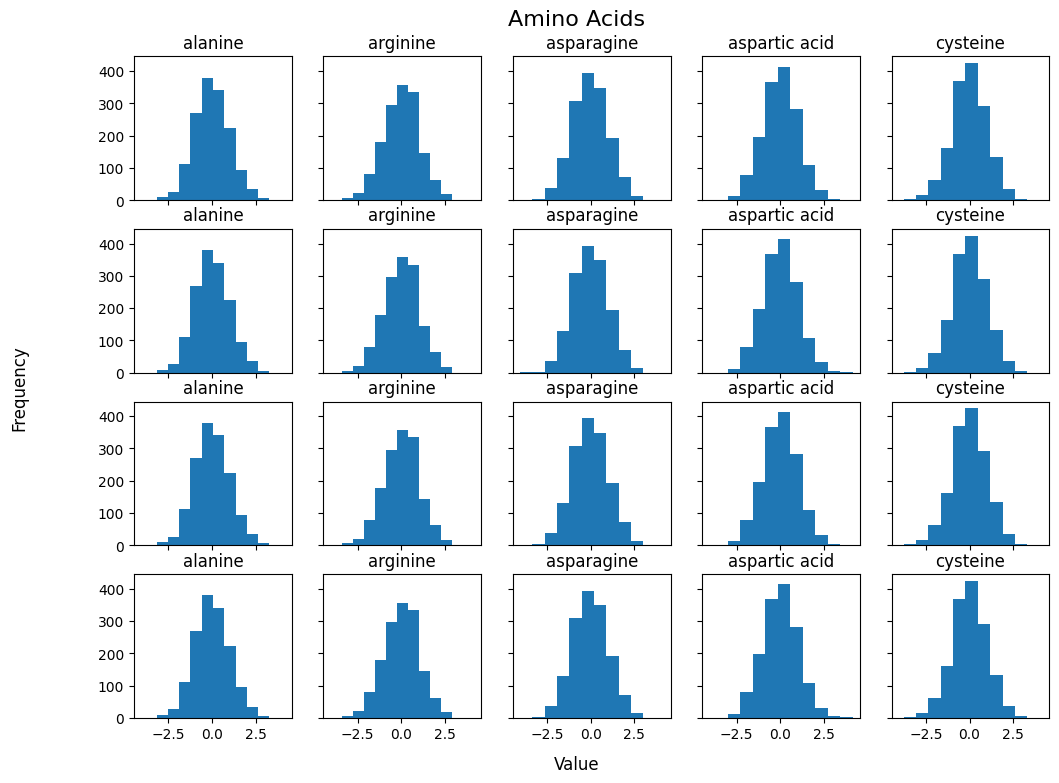

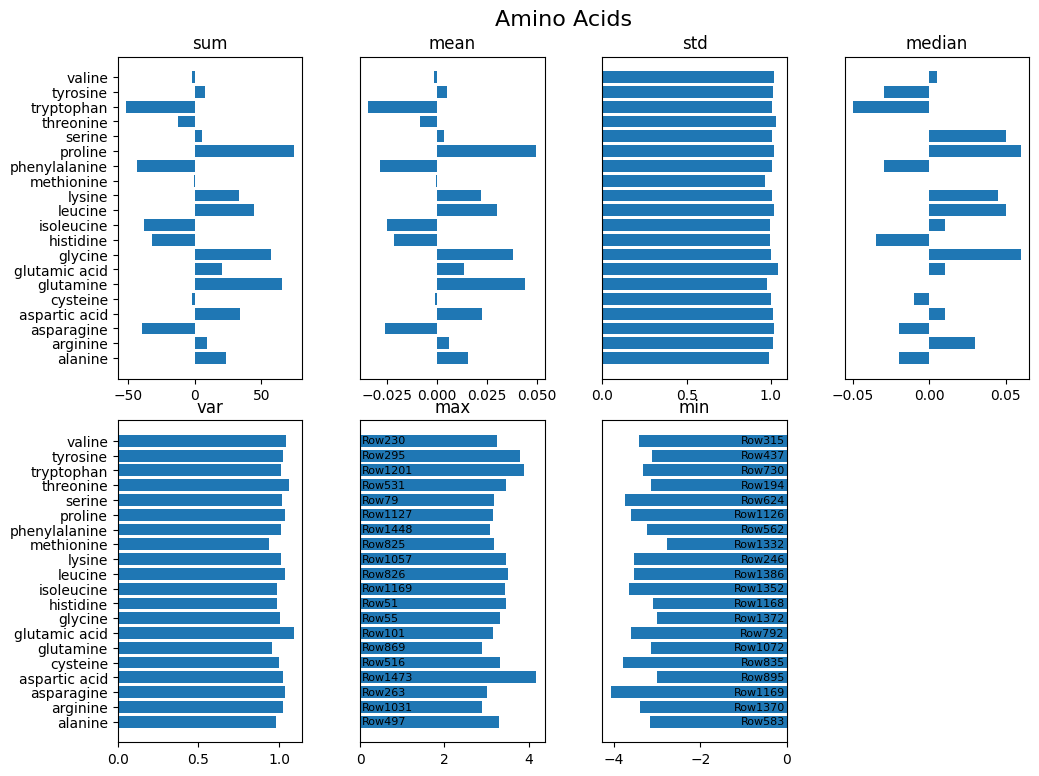

In [133]:
import pandas as pd
import tkinter as tk
import tkinter.font as font
import numpy as np
import matplotlib.pyplot as plt
# centimeters in inches for matplotlib
cm = 1/2.54

############## Functions #####################

# Function to add more data to the amino acid or nucleotide DataFrame using User Input
# invalid input is flagged and asked for until correct
def add_data(df):
    new_row = "Row" + str(len(df)+1)

    for elem in df.columns:
        while True:
            try:
                val = float(input(f"Enter the value for {elem}:"))
            except ValueError:
                print()
                print(f"Invalid input! If value is missing enter NaN.\nElse enter the value for {elem} as a number:")
                continue
            else:
                break
        df.loc[new_row,elem] = val

# Function to do all the calculations and save them in a dictionary
# you need to have a result dictionary before starting (= outer_dict), which can be emtpy or added to
# you then need the DataFrame to be analysed (df) and a name describing the df
def df_calc(df, name, outer_dict):
    if type(outer_dict) != dict:
        raise Exception ("The outer_dict must be a dictionary!")
    elif type(name) != str:
        raise Exception ("The name must be a string!")
    elif type(df) != pd.core.frame.DataFrame or not df_aa.select_dtypes(exclude=["float", 'int']).empty:
        raise Exception ("The DataFrame must be a Pandas DataFrame containg only floats or integers!")
    else:
        outer_dict[name] = {}
        
        outer_dict[name]["sum"] = {}
        outer_dict[name]["mean"] = {}
        outer_dict[name]["std"] = {}
        outer_dict[name]["median"] = {}
        outer_dict[name]["mode"] = {}
        outer_dict[name]["var"] = {}
        outer_dict[name]["max"] = {}
        outer_dict[name]["min"] = {}
        outer_dict[name]["idxmin"] = {}
        outer_dict[name]["idxmax"] = {}
        
        for names in df.columns:
            outer_dict[name]["sum"][names] = df.sum()[names]
            outer_dict[name]["mean"][names] = df.mean()[names]
            outer_dict[name]["std"][names] = df.std()[names]
            outer_dict[name]["median"][names] = df.median()[names]
            outer_dict[name]["mode"][names] = df.mode()[names]
            outer_dict[name]["var"][names] = df.var()[names]
            outer_dict[name]["max"][names] = df.max()[names]
            outer_dict[name]["min"][names] = df.min()[names]
            outer_dict[name]["idxmin"][names] = df.idxmin()[names]
            outer_dict[name]["idxmax"][names] = df.idxmax()[names]

#### Create the DataFrames
# Prepare the row and col names. 
# To keep the lines short and readable I create the amino acids names in two steps 
rownames1 = ["Row"+str(i) for i in range(1,1501)]
colnamesN = ["A","C","G","T","U"]
colnamesA = ["alanine","arginine","asparagine","aspartic acid","cysteine","glutamine","glutamic acid","glycine","histidine","isoleucine"]
colnamesA2 = ["leucine","lysine","methionine","phenylalanine","proline","serine","threonine","tryptophan","tyrosine","valine"]
colnamesA.extend(colnamesA2)

# create the actual DataFrames
df_aa = pd.DataFrame(np.random.randn(1500,20), index = rownames1, columns = colnamesA)
df_nt = pd.DataFrame(np.random.randn(1500,5), index = rownames1, columns = colnamesN)

#round the random numbers for ease of readability
for i in range(0,1500):
    for j in range(0,20):
        df_aa.iloc[i,j] = round(df_aa.iloc[i,j],2)

for i in range(0,1500):
    for j in range(0,5):
        df_nt.iloc[i,j] = round(df_nt.iloc[i,j],2)

#### Ask the User if they want to work with AA, Nucleotides or both
#### Ask if more data is to be added
# two functions for my GUI to add the data to my dataframe
def add_nt_data():
    #first I check my input
    for nt in range(5):
        try:
            val = float(input_nt_dict[list(input_nt_dict.keys())[nt]].get())
            add_nt_button.config (text = "Data added.\nDo you wish to add\nmore Nucleotide data?")
        except tk.TclError as error:
            add_nt_button.config (text = "Wrong input.\nDo you still wish to enter\nmore Nucleotide data?")
            return
    
    ##if the data is suitable (i.e. a number) I add it to my DataFrame
    #create the new rowname
    new_row = "Row" + str(len(df_nt)+1)
    #add the data
    for nt in range(5):     
        df_nt.loc[new_row,df_nt.columns[nt]] = float(input_nt_dict[list(input_nt_dict.keys())[nt]].get())

def add_aa_data():
    #first I check my input
    for aa in range(20):
        try:
            val = float(input_aa_dict[list(input_aa_dict.keys())[aa]].get())
            add_aa_button.config (text = "Data added.\n Do you wish to add\nmore Amino Acid data?")
        except tk.TclError as error:
            add_aa_button.config (text = "Wrong input.\nDo you still wish to enter\nmore Amino Acid data?")
            return
    
    ##if the data is suitable (i.e. a number) I add it to my DataFrame
    #create the new rowname
    new_row = "Row" + str(len(df_aa)+1)
    #add the data
    for aa in range(20):     
        df_aa.loc[new_row,df_aa.columns[aa]] = float(input_aa_dict[list(input_aa_dict.keys())[aa]].get())
        

#### Asking and inputting data

root = tk.Tk()
root.geometry("500x500")
data_var = tk.StringVar()
data_var.set("Amino Acids and Nucleotides")
data_choice = tk.OptionMenu(root, data_var,  "Amino Acids", "Nucleotides","Amino Acids and Nucleotides")
close_button = tk.Button (root, text = "Start Analysis", command = root.destroy)
nt_label_h = tk.Label (root, text = "Do you wish to add Nucleotide data?")
aa_label_h = tk.Label (root, text = "Do you wish to add Amino Acid data?")

#adding the amino acid labels
label_aa_dict = {}
for aa in range(20):                          
    label_aa_dict["aa_label_" + str(aa)] = tk.Label (root, text = df_aa.columns[aa])
#adding the nucleotides labels
label_nt_dict = {}
for nt in range(5):                          
    label_nt_dict["nt_label_" + str(nt)] = tk.Label (root, text = df_nt.columns[nt])

#adding the amoino acid variables
input_aa_dict = {}
for aa in range(20):                          
    input_aa_dict["input_aa_" + str(aa)] = tk.DoubleVar()
#adding the nucleotide variables
input_nt_dict = {}
for nt in range(5):                          
    input_nt_dict["input_nt_" + str(nt)] = tk.DoubleVar()

#adding the AmoniAcid entry fields
entry_aa_dict = {}
for aa in range(20):                          
    entry_aa_dict["entry_aa_" + str(aa)] = tk.Entry(root,  textvariable = input_aa_dict[list(input_aa_dict.keys())[aa]])

#adding the nucleotide entry fields
entry_nt_dict = {}
for nt in range(5):                          
    entry_nt_dict["entry_nt_" + str(nt)] = tk.Entry(root,  textvariable = input_nt_dict[list(input_nt_dict.keys())[nt]])

#Making buttons to add the data after input
add_aa_button = tk.Button (root, text = "Add Amino Acid Data", command = add_aa_data)
add_nt_button = tk.Button (root, text = "Add Nucleotide Data", command = add_nt_data)

##### PLACE ######

#Data Choice Menu
data_choice.place(x = 0, y = 0, relheight = 0.1, relwidth = 0.5)
close_button.place(relx = 0.5, y =0, relheight =0.1, relwidth=0.5)
#Labels to ask if data is to be added
aa_label_h.place(x = 0, rely = 0.1, relheight = 0.1, relwidth = 0.5)
nt_label_h.place(relx = 0.5, rely = 0.1, relheight = 0.1, relwidth = 0.5)

#the AminoAcid names
for i,j in zip(range (20),np.arange(0.2,1,0.04)):
    label_aa_dict[list(label_aa_dict.keys())[i]].place(relx = 0, rely = j, relheight = 0.04, relwidth = 0.25)
#the Nucleotide names
for i,j in zip(range (5),np.arange(0.2,1,0.04)):
    label_nt_dict[list(label_nt_dict.keys())[i]].place(relx = 0.5, rely = j, relheight = 0.04, relwidth = 0.25)

#the AminoAcid entry fields
for i,j in zip(range (20),np.arange(0.2,1,0.04)):
    entry_aa_dict[list(entry_aa_dict.keys())[i]].place(relx = 0.25, rely = j, relheight = 0.04, relwidth = 0.25)
#the Nucleotide entry fields
for i,j in zip(range (5),np.arange(0.2,1,0.04)):
    entry_nt_dict[list(entry_nt_dict.keys())[i]].place(relx = 0.75, rely = j, relheight = 0.04, relwidth = 0.25)

#the AminoAcid Button
add_aa_button.place(relx = 0.5, rely = 0.7, relheight = 0.2, relwidth =0.5)
#the Nucleotide Button
add_nt_button.place(relx = 0.5, rely = 0.5, relheight = 0.2, relwidth =0.5)

root.mainloop()

if data_var.get() == "Amino Acids and Nucleotides":
    input0 = "B"
elif data_var.get() == "Amino Acids":
    input0 = "A"
elif data_var.get() == "Nucleotides":
    input0 = "N"

#### Create the histograms

# Histogram for the amino acids
if input0 == "A" or input0== "B":
    fig, axs = plt.subplots(4,5,sharex=True, sharey = True)
    fig.set_figwidth(30*cm)
    fig.set_figheight(20*cm)
    #fig.suptitle('Nucleotides')
    for i,j in zip([0,1,2,3,4,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4],[0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,3,3,3,3,3]):
        axs[j,i].hist(df_aa.iloc[:,i])
        axs[j,i].set(title = df_aa.iloc[:,i].name)

    # Hide x labels and tick labels for top plots and y ticks for right plots
    for ax in axs.flat:
        ax.label_outer()
    fig.suptitle("Amino Acids", fontsize=16)
    fig.supxlabel('Value')
    fig.supylabel('Frequency')
    plt.subplots_adjust(top=0.92, bottom =0.08)

    plt.show() 
    #plt.savefig("Image.png")
    plt.close()

# Histogram for the nulceotides
if input0 == "N" or input0== "B":
    fig, axs = plt.subplots(1,5,sharex=True, sharey = True)
    fig.set_figwidth(30*cm)
    fig.set_figheight(6*cm)
    #fig.suptitle('Nucleotides')
    for i in range(0,len(df_nt.columns)):
        axs[i].hist(df_nt.iloc[:,i])
        axs[i].set( ylabel='Frequency', title = df_nt.iloc[:,i].name)

    # Hide x labels and tick labels for top plots and y ticks for right plots
    for ax in axs.flat:
        ax.label_outer()
    fig.suptitle("Nucleotides", fontsize=16)
    fig.supxlabel('Value')
    plt.subplots_adjust(top=0.8, bottom =0.2)

    plt.show() 
    #plt.savefig("Image.png")
    plt.close()

#### Perform the calculations
#first set the result dictionary
results = {}

#run the calculations
if input0 == "A" or input0== "B":
    df_calc(df_aa, "amino_acids", results)

if input0 == "N" or input0== "B":
    df_calc(df_nt, "nucleotides", results)

#### Plot the calculation results

# Plot the results for the Amino Acids
if input0 == "A" or input0== "B":
    fig, axs = plt.subplots(2,4)
    fig.set_figwidth(25*cm)
    fig.set_figheight(20*cm)
    fig.tight_layout()
    fig.suptitle("Amino Acids", fontsize=16)
    for calc,i,j in zip(results["amino_acids"],[0,0,0,0,0,1,1,1,1,1],[0,1,2,3,4,0,1,2,3,4]):
        if i == 1 and j == 3:
            axs[i,j].axis('off')
        if calc == "mode" or calc == "idxmin" or calc == "idxmax":
            continue
        axs[i,j].barh(list(results["amino_acids"][calc].keys()),results["amino_acids"][calc].values())
        axs[i,j].set( title=calc)
        if calc == "max":
            for names in results["amino_acids"]["max"]:
                axs[i,j].text(0.05,names,results["amino_acids"]["idxmax"][names],fontsize = 8, verticalalignment = "center", horizontalalignment = "left")
        if calc == "min":
            for names in results["amino_acids"]["min"]:
                axs[i,j].text(-0.05,names,results["amino_acids"]["idxmin"][names],fontsize = 8, verticalalignment = "center", horizontalalignment = "right")
        if j != 0:
            axs[i,j].set(yticks = [])

    plt.subplots_adjust(top=0.92)
    plt.show() 
    #plt.savefig("Project_DataFrame_AminoAcid_Results.png")
    plt.close()


# Plot the results for the Nucleotides
if input0 == "N" or input0== "B":
    fig, axs = plt.subplots(2,4)
    fig.set_figwidth(25*cm)
    fig.set_figheight(10*cm)
    fig.tight_layout()
    fig.suptitle("Nucleotides", fontsize=16)
    for calc,i,j in zip(results["nucleotides"],[0,0,0,0,0,1,1,1,1,1],[0,1,2,3,4,0,1,2,3,4]):
        if i == 1 and j == 3:
            axs[i,j].axis('off')
        if calc == "mode" or calc == "idxmin" or calc == "idxmax":
            continue
        axs[i,j].barh(list(results["nucleotides"][calc].keys()),results["nucleotides"][calc].values())
        axs[i,j].set( title=calc)
        if calc == "max":
            for names in results["nucleotides"]["max"]:
                axs[i,j].text(0.05,names,results["nucleotides"]["idxmax"][names],fontsize = 8, verticalalignment = "center", horizontalalignment = "left")
        if calc == "min":
            for names in results["nucleotides"]["min"]:
                axs[i,j].text(-0.05,names,results["nucleotides"]["idxmin"][names],fontsize = 8, verticalalignment = "center", horizontalalignment = "right")
        if j != 0:
            axs[i,j].set(yticks = [])

    plt.subplots_adjust(top=0.88)
    plt.show() 
    #plt.savefig("Project_DataFrame_Nucleotide_Results.png")
    plt.close()